**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/manipulating-geospatial-data).**

---


# "Exercise: Manipulating Geospatial Data"
> "kaggle test"

- toc: true
- branch: master
- badges: true
- comments: true
- author: YeEun
- categories: [jupyter, python]

# Introduction

You are a Starbucks big data analyst ([that’s a real job!](https://www.forbes.com/sites/bernardmarr/2018/05/28/starbucks-using-big-data-analytics-and-artificial-intelligence-to-boost-performance/#130c7d765cdc)) looking to find the next store into a [Starbucks Reserve Roastery](https://www.businessinsider.com/starbucks-reserve-roastery-compared-regular-starbucks-2018-12#also-on-the-first-floor-was-the-main-coffee-bar-five-hourglass-like-units-hold-the-freshly-roasted-coffee-beans-that-are-used-in-each-order-the-selection-rotates-seasonally-5).  These roasteries are much larger than a typical Starbucks store and have several additional features, including various food and wine options, along with upscale lounge areas.  You'll investigate the demographics of various counties in the state of California, to determine potentially suitable locations.

<center>
<img src="https://i.imgur.com/BIyE6kR.png" width="450"><br/><br/>
</center>

Before you get started, run the code cell below to set everything up.

In [3]:
import math
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim            # What you'd normally run

import folium 
from folium import Marker
from folium.plugins import MarkerCluster

You'll use the `embed_map()` function from the previous exercise to visualize your maps.

In [4]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# Exercises

### 1) Geocode the missing locations.

Run the next code cell to create a DataFrame `starbucks` containing Starbucks locations in the state of California.

# 캘리포니아에 있는 스타벅스

In [5]:
# Load and preview Starbucks locations in California
starbucks = pd.read_csv("archive\starbucks_locations.csv")
starbucks.head()

,Store Number,Store Name,Address,City,Longitude,Latitude
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto,-117.40,34.51
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura,-118.76,34.16
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills,-118.76,34.15
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,-117.75,33.87
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda,-122.28,37.79


Most of the stores have known (latitude, longitude) locations.  But, all of the locations in the city of Berkeley are missing.

# Berkeley에 있는 스타벅스의 위도, 경도 데이터 누락

In [6]:
# How many rows in each column have missing values?
print(starbucks.isnull().sum())

# View rows with missing locations
rows_with_missing = starbucks[starbucks["City"]=="Berkeley"]
rows_with_missing

Store Number    0
Store Name      0
Address         0
City            0
Longitude       5
Latitude        5
dtype: int64


,Store Number,Store Name,Address,City,Longitude,Latitude
153,5406-945,2224 Shattuck - Berkeley,2224 Shattuck Avenue Berkeley CA,Berkeley,NaN,NaN
154,570-512,Solano Ave,1799 Solano Avenue Berkeley CA,Berkeley,NaN,NaN
155,17877-164526,Safeway - Berkeley #691,1444 Shattuck Place Berkeley CA,Berkeley,NaN,NaN
156,19864-202264,Telegraph & Ashby,3001 Telegraph Avenue Berkeley CA,Berkeley,NaN,NaN
157,9217-9253,2128 Oxford St.,2128 Oxford Street Berkeley CA,Berkeley,NaN,NaN


- geocoder 사용

Use the code cell below to fill in these values with the Nominatim geocoder.

Note that in the tutorial, we used `Nominatim()` (from `geopy.geocoders`) to geocode values, and this is what you can use in your own projects outside of this course.  

In this exercise, you will use a slightly different function `Nominatim()` (from `learntools.geospatial.tools`).  This function was imported at the top of the notebook and works identically to the function from GeoPandas.

So, in other words, as long as: 
- you don't change the import statements at the top of the notebook, and 
- you call the geocoding function as `geocode()` in the code cell below, 

your code will work as intended!

In [7]:
# Create the geocoder
geolocator = Nominatim(user_agent="kaggle_learn")

# Your code here
def my_geocoder(row):
    point = geolocator.geocode(row).point
    return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})

berkeley_locations = rows_with_missing.apply(lambda x: my_geocoder(x['Address']), axis=1)
starbucks.update(berkeley_locations)


# Check your answer
#q_1.check()

In [5]:
# Line below will give you solution code
#q_1.solution()

### 2) View Berkeley locations.

Let's take a look at the locations you just found.  Visualize the (latitude, longitude) locations in Berkeley in the OpenStreetMap style. 

# Berkeley 위치 시각화

In [8]:
# Create a base map
m_2 = folium.Map(location=[37.88,-122.26], zoom_start=10) # 배율 설정

# Your code here: Add a marker for each Berkeley location
for idx, row in starbucks[starbucks["City"]=='Berkeley'].iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_2)

# 위치 표시

# Uncomment to see a hint
#q_2.a.hint()

# Show the map
embed_map(m_2, 'q_2.html')

In [7]:
# Get credit for your work after you have created a map
#q_2.a.check()

# Uncomment to see our solution (your code may look different!)
#q_2.a.solution()

Considering only the five locations in Berkeley, how many of the (latitude, longitude) locations seem potentially correct (are located in the correct city)?

# Berkeley 의 위치를 고려했을 때 정확해보이는 위치 

In [11]:
# View the solution (Run this code cell to receive credit!)
#q_2.b.solution()

- 전체적으로 다섯개 전부 정확해보인다. 

### 3) Consolidate your data.

Run the code below to load a GeoDataFrame `CA_counties` containing the name, area (in square kilometers), and a unique id (in the "GEOID" column) for each county in the state of California.  The "geometry" column contains a polygon with county boundaries.

# 데이터 통합

In [9]:
CA_counties = gpd.read_file("archive\CA_county_boundaries\CA_county_boundaries\CA_county_boundaries.shp")
CA_counties.head()

,GEOID,name,area_sqkm,geometry
0,6091,Sierra County,2491.995494,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,6067,Sacramento County,2575.258262,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
2,6083,Santa Barbara County,9813.817958,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
3,6009,Calaveras County,2685.626726,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
4,6111,Ventura County,5719.321379,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


Next, we create three DataFrames:
- `CA_pop` contains an estimate of the population of each county.
- `CA_high_earners` contains the number of households with an income of at least $150,000 per year.
- `CA_median_age` contains the median age for each county.

In [10]:
CA_pop = pd.read_csv("archive\CA_county_population.csv", index_col="GEOID")
CA_high_earners = pd.read_csv("archive\CA_county_high_earners.csv", index_col="GEOID")
CA_median_age = pd.read_csv("archive\CA_county_median_age.csv", index_col="GEOID")

Use the next code cell to join the `CA_counties` GeoDataFrame with `CA_pop`, `CA_high_earners`, and `CA_median_age`.

Name the resultant GeoDataFrame `CA_stats`, and make sure it has 8 columns: "GEOID", "name", "area_sqkm", "geometry", "population", "high_earners", and "median_age".  Also, make sure the CRS is set to `{'init': 'epsg:4326'}`.

In [12]:
# Your code here
cols_to_add = CA_pop.join([CA_high_earners, CA_median_age]).reset_index()
CA_stats = CA_counties.merge(cols_to_add, on="GEOID")
CA_stats.crs = {'init': 'epsg:4326'}
# Check your answer
#q_3.check()

c:\Users\82108\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

Now that we have all of the data in one place, it's much easier to calculate statistics that use a combination of columns.  Run the next code cell to create a "density" column with the population density.

# 인구밀도 열 생성

In [13]:
CA_stats["density"] = CA_stats["population"] / CA_stats["area_sqkm"]

### 4) Which counties look promising?

Collapsing all of the information into a single GeoDataFrame also makes it much easier to select counties that meet specific criteria.

Use the next code cell to create a GeoDataFrame `sel_counties` that contains a subset of the rows (and all of the columns) from the `CA_stats` GeoDataFrame.  In particular, you should select counties where:
- there are at least 100,000 households making \$150,000 per year,
- the median age is less than 38.5, and
- the density of inhabitants is at least 285 (per square kilometer).

Additionally, selected counties should satisfy at least one of the following criteria:
- there are at least 500,000 households making \$150,000 per year,
- the median age is less than 35.5, or
- the density of inhabitants is at least 1400 (per square kilometer).

# 위의 조건에 만족하는 유망한 카운티(행정구역)

In [14]:
# Your code here
sel_counties = CA_stats[((CA_stats.high_earners > 100000) &
                         (CA_stats.median_age < 38.5) &
                         (CA_stats.density > 285) &
                         ((CA_stats.median_age < 35.5) |
                         (CA_stats.density > 1400) |
                         (CA_stats.high_earners > 500000)))]

sel_counties
# Check your answer
#q_4.check()

,GEOID,name,area_sqkm,geometry,population,high_earners,median_age,density
5,6037,Los Angeles County,12305.376879,"MULTIPOLYGON (((-118.66761 33.47749, -118.6682...",10105518,501413,36.0,821.227834
8,6073,San Diego County,11721.342229,"POLYGON ((-117.43744 33.17953, -117.44955 33.1...",3343364,194676,35.4,285.237299
10,6075,San Francisco County,600.588247,"MULTIPOLYGON (((-122.60025 37.80249, -122.6123...",883305,114989,38.3,1470.733077


In [18]:
# Lines below will give you a hint or solution code
#q_4.hint()
#q_4.solution()

### 5) How many stores did you identify?

When looking for the next Starbucks Reserve Roastery location, you'd like to consider all of the stores within the counties that you selected.  So, how many stores are within the selected counties?

To prepare to answer this question, run the next code cell to create a GeoDataFrame `starbucks_gdf` with all of the starbucks locations.

In [15]:
starbucks_gdf = gpd.GeoDataFrame(starbucks, geometry=gpd.points_from_xy(starbucks.Longitude, starbucks.Latitude))
starbucks_gdf.crs = {'init': 'epsg:4326'}

c:\Users\82108\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


So, how many stores are in the counties you selected?

In [36]:
import matplotlib.image as img
import matplotlib.pyplot as plt

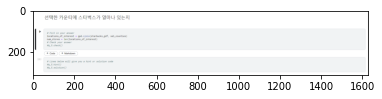

In [37]:
fileName = "kaggle_1.png"

ndarray = img.imread(fileName)

plt.imshow(ndarray)
plt.show()

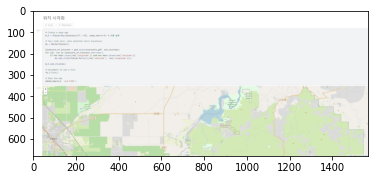

In [38]:
fileName_2 = "kaggle_2.png"

ndarray = img.imread(fileName_2)

plt.imshow(ndarray)
plt.show()

# Keep going

Learn about how **[proximity analysis](https://www.kaggle.com/alexisbcook/proximity-analysis)** can help you to understand the relationships between points on a map.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*